# Plotting and refining a mesh

We represent a triangular mesh using two NumPy arrays. Let $N$ be the number of vertices and $M$ be the number of elements. The vertices are stored in $2 \times N$ array and the elements are stored in $3 \times N$ array.

In [46]:
import numpy as np

p = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
t = np.array([[0, 1, 2], [1, 2, 3]]).T

The plotting can be done using Matplotlib built-in function.

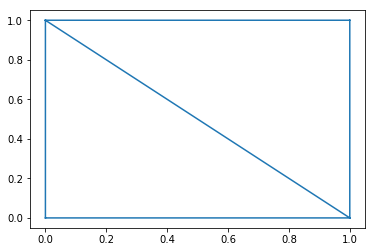

In [47]:
import matplotlib.pyplot as plt

def draw_tri(p, t):
    """Draw a triangular mesh."""
    return plt.triplot(p[0, :], p[1, :], t.T)
    
draw_tri(p, t)

In order to do anything fancy with the mesh we require edges and mappings from triangles to edges. This is achieved by the following function.

In [48]:
def build_edges(p, t):
    """Define edges and triangle to edge mappings."""
    edges = np.sort(np.hstack((t[[0, 1], :], t[[1, 2], :], t[[0, 2], :])), axis=0)
    tmp = np.ascontiguousarray(edges.T)
    tmp, ixa, ixb = np.unique(tmp.view([('', tmp.dtype)] * tmp.shape[1]),
                              return_index=True, return_inverse=True)
    edges = edges[:, ixa] 
    t2e = ixb.reshape((3, t.shape[1]))
    return edges, t2e

Using the edge information we can for example refine the mesh.

In [49]:
def refine_tri(p, t):
    """Refine a triangular mesh by splitting each
    triangle into four subtriangles."""
    e, t2e = build_edges(p, t)
    t2e += p.shape[1]
    p_ = np.hstack((p, .5*(p[:, e[0, :]] + p[:, e[1, :]])))
    t1 = np.vstack((t[0, :], t2e[0, :], t2e[2, :]))
    t2 = np.vstack((t[1, :], t2e[0, :], t2e[1, :]))
    t3 = np.vstack((t[2, :], t2e[2, :], t2e[1, :]))
    t4 = np.vstack((t2e[0, :], t2e[1, :], t2e[2, :]))
    t_ = np.hstack((t1, t2, t3, t4))
    return p_, t_

Let's try it out.

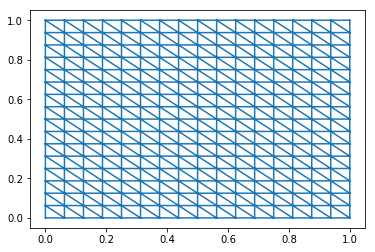

In [50]:
for itr in range(4):
    p, t = refine_tri(p, t)
draw_mesh(p, t)